Modifying 

In [2]:
import numpy as np
import pandas as pd

import ProGED as pg

from DN4_2_podatky import * 

In [9]:
from nltk import Nonterminal

np.random.seed(1234)

grammar = "E -> E '+' F [0.9]| E '-' F [0]| F [0.1] \n"
grammar += "F -> F '*' T [0.2]| F '/' T [0.4]| T [0.4] \n"
grammar += "T -> V [0.4]| '('E')' [0.3]| 'sin' '('E')'[0.3] \n"
grammar += "V -> 'x1' [0.2]| 'x2' [0.2]| 'x3' [0.2] | 'x4' [0.2] | 'x5' [0.2]"


grammar = pg.GeneratorGrammar(grammar)
podatki = generiraj_enacbo_1(100)
ED = pg.EqDisco(data=podatki, 
                sample_size=3,
                lhs_vars=["y"],
                rhs_vars=["x1", "x2", "x3", "x4", "x5"],
                #verbosity=1,
                generator = grammar)
#pg.Model
ED.generate_models()
mm = ED.fit_models()
#print(mm[2].get_params())
print(ED.get_stats())

#print(ED.get_results(1))
#print(grammar)
hji = list(range(1,11))
#print(grammar.count_trees(Nonterminal("E"), 1))
drevesa = [grammar.count_trees(Nonterminal("E"), h) for h in range(1, 11)]
#print(drevesa)
#print(Nonterminal("E"))
print(grammar.code_to_expression(ED.models[0].info['code'])[1])
#print(mm[0].get_error())

ModelBox: 3 models
-> [x2*x4], p = 5.120000000000003e-05, parse trees = 1, valid = True, error = 43.30284691772874, time = 0
-> [x4], p = 0.003200000000000001, parse trees = 1, valid = True, error = 22.52230705623742, time = 0
-> [x2 + x3], p = 9.216000000000005e-05, parse trees = 1, valid = True, error = 28.333090768512253, time = 0
   N  N-valid         P   P-valid  N-success  P-success
0  3        3  0.003343  0.003343          0          0
[E -> F [0.1], F -> F '*' T [0.2], F -> T [0.4], T -> V [0.4], V -> 'x2' [0.2], T -> V [0.4], V -> 'x4' [0.2]]


In [9]:
#print(ED.models[0].info['code'])
path = grammar.code_to_expression(ED.models[0].info['code'])[1]
gg = grammar.grammar.productions()
print(gg)


#print(grammar.grammar.productions()[0])

[E -> E '+' F [0.9], E -> E '-' F [0], E -> F [0.1], F -> F '*' T [0.2], F -> F '/' T [0.4], F -> T [0.4], T -> V [0.4], T -> '(' E ')' [0.3], T -> 'sin' '(' E ')' [0.3], V -> 'x1' [0.2], V -> 'x2' [0.2], V -> 'x3' [0.2], V -> 'x4' [0.2], V -> 'x5' [0.2]]


In [ ]:
def update_prob(gram, path, rate) -> str:
    """
    The function get 
        gram grammar object ... our given grammar
        path grammar object ... winer or loser path 
        rate int ... rate how much shoud probability of given path shoud be updated

        Return new grammar string with new probabilites
    """
    pass

def get_distibution_of_variable(gram) -> dict:
    
    pass


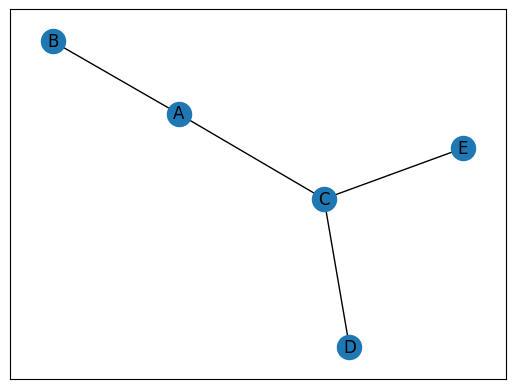

In [5]:
import networkx as nx
import matplotlib.pyplot as plt

# Create an empty graph
G = nx.Graph()

# Add nodes
G.add_node("A")
G.add_node("B")
G.add_node("C")
G.add_node("D")
G.add_node("E")

# Add edges
G.add_edge("A", "B")
G.add_edge("A", "C")
G.add_edge("C", "D")
G.add_edge("C", "E")

# Draw the graph
pos = nx.spring_layout(G)
nx.draw_networkx(G, pos)
plt.show()

In [6]:
import matplotlib.pyplot as plt

# Define a custom tree structure
class TreeNode:
    def __init__(self, data):
        self.data = data
        self.children = []

    def add_child(self, child):
        self.children.append(child)

# Create the tree
root = TreeNode("A")
root.add_child(TreeNode("B"))
root.add_child(TreeNode("C"))
root.children[1].add_child(TreeNode("D"))

# Visualize the tree using Matplotlib
def visualize_tree(node, level=0):
    print("  " * level + "- " + node.data)
    for child in node.children:
        visualize_tree(child, level + 1)

visualize_tree(root)

- A
  - B
  - C
    - D
